In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [7]:
reviews = pd.read_csv("K8 Reviews v0.2.csv")

In [8]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


    Dataset is scrapped from Amazon for Lenovo K8 mobile phones
    Review in the form of free text was scrapped and the user rating
    A user rating of 1,2,3 -> sentiment 0
    A user rating of 4 and 5 -> sentiment 1

In [10]:
reviews.shape

(14675, 2)

In [11]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

### Get the word cloud:

    1. combine all the reviews into a single string
    2. instantiate word cloud
    3. generate the word cloud

In [12]:
from wordcloud import WordCloud

In [13]:
reviews_combined = " ".join(reviews.review.values)

In [14]:
lst = ["A","B","C"]
" ".join(lst)

'A B C'

In [15]:
len(reviews_combined)

1674772

In [16]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [17]:
word_cloud = WordCloud().generate(reviews_combined)

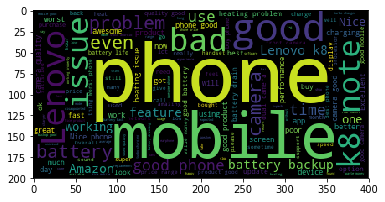

In [18]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [19]:
word_cloud = WordCloud(width=800,height=800,
                       background_color='white',
                       max_words=150).\
generate(reviews_combined)

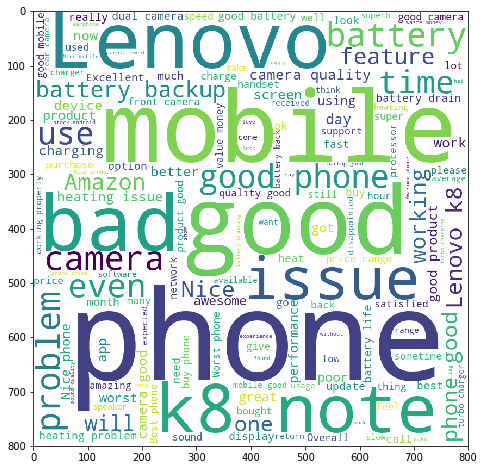

In [20]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

## Bar graph of top 25 used words

1. get the words and the frequencies
2. sort based on frequencies and get the top 25 words
3. plot the bar graph

In [21]:
#Preparing a dictionary of words and their frequencies
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [22]:
#From the dict obtain a data frame of words and freq's
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

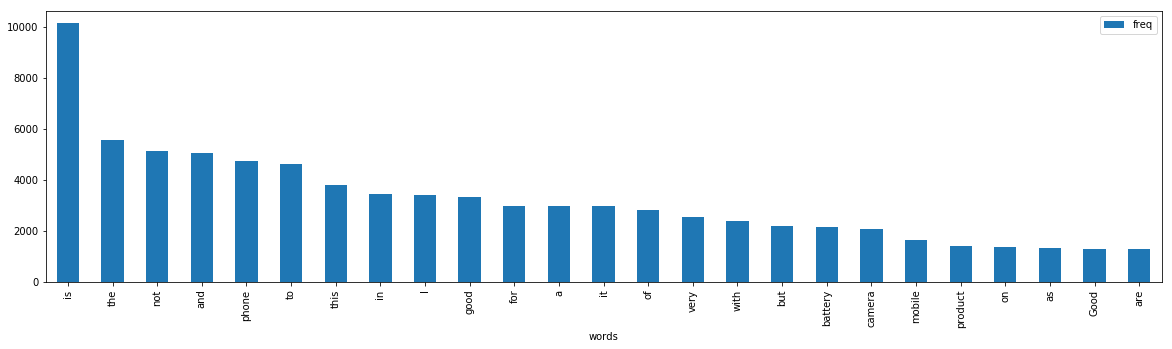

In [23]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with these visuals:
    1.Too many distinct words in the corpus of reviews
        1.text is non unifrom case
        2.punctuations present in the text
        3. there are language connectors in the text - stop words
        4. Words with different forms/tenses - charge, charged, charging

Basic Text processing tasks:
    1. Text cleaning
    2. Get the visuals - word cloud and bar graph or frequency graph
    3. Converting text to numeric matrices
    4. Advanced visuals using collocations(n-grams - unigrams, bigrams, trigrams)
    5. Sentiment analysis and sentiment classification
    6. text classification
    7. document clustering

In [24]:
from nltk.tokenize import word_tokenize

In [25]:
all_terms = word_tokenize(reviews_combined.lower())

In [26]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [27]:
len(reviews_combined), len(all_terms)

(1674772, 324233)

In [28]:
from nltk.probability import FreqDist

In [29]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

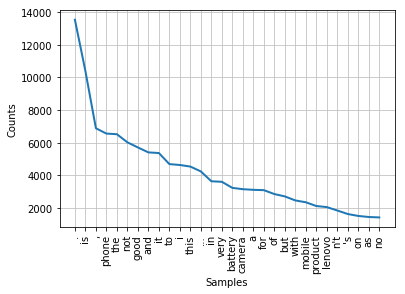

In [30]:
fdist.plot(30,cumulative=False)
plt.show()

The head and the tail of the above graph consists of either punct or stop words which needs to be removed

In [32]:
from string import punctuation
from nltk.corpus import stopwords

In [33]:
stop_nltk = stopwords.words("english")

In [34]:
stop_updated = stop_nltk + ["...",".."] +\
["mobile","phone","lenovo","k8","note","n't"]

In [35]:
reviews_updated1 = [term for term in all_terms \
if term not in stop_updated and term 
                    not in list(punctuation) and len(term)>2]

In [36]:
len(set(reviews_updated1))

18475

In [37]:
print(reviews_updated1[:200])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.this', 'biggest', 'lie', 'amazon', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'charged.do', 'know', 'survive', 'making', 'full', 'us.please', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'january..', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'amazon', 'returning', '.highly', 'disappointing', 'amazon', 'telling', 'buyi', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allot..really', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problems', 'hanging', 'problems', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', 'buy', 'thing', 'better',

In [38]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [39]:
reviews_updated_stem = [ stemmer_s.stem(word) for word in reviews_updated1]

In [40]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [41]:
reviews_updated_lemm = [ lemm.lemmatize(word) for word in reviews_updated1]

In [42]:
print(len(set(reviews_updated_stem)),len(set(reviews_updated_lemm)))

16161 17902


stemmer reduces the number of distinct words in the corpus to a greater exten

lets build a udf

- input : review 
- Tasks : All the above cleaning steps
- Return : string of cleaned reveiw

based on the outcome of this function, you should be able to add a new column in the data frame called as "cleaned_review"

In [43]:
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens \
               if term not in stop_updated and \
                term not in list(punctuation) and\
               len(term) > 2] 
    res = " ".join(stemmed)
    return res

In [44]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [45]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...


# Word cloud on cleaned dataset

In [46]:
reviews_combined = " ".join(reviews.clean_review.values)

In [47]:
reviews_combined[:500]

'good need updat improv worst bought ever batteri drain like hell backup hour internet use even put idl get discharged.thi biggest lie amazon lenov expect make full say batteri 4000mah booster charger fake take least hour fulli charged.do know surviv make full us.pleas els regret like get cash back alreadi january.. good worst everthey chang last problem still amazon return .high disappoint amazon tell buyi total disappointedpoor batterypoor camerawast money awesom charg heat allot..r genuin reas'

In [48]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined)

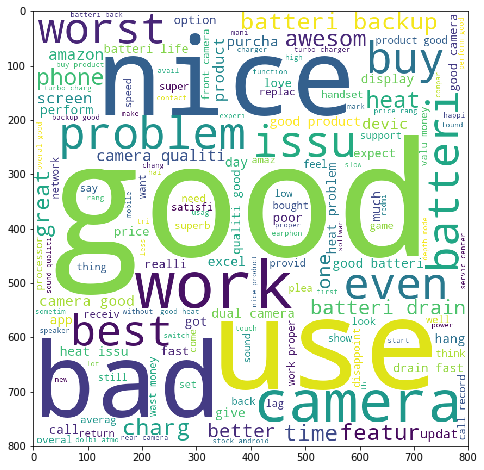

In [49]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

# Bar Graph on top 25 words

In [50]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [51]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

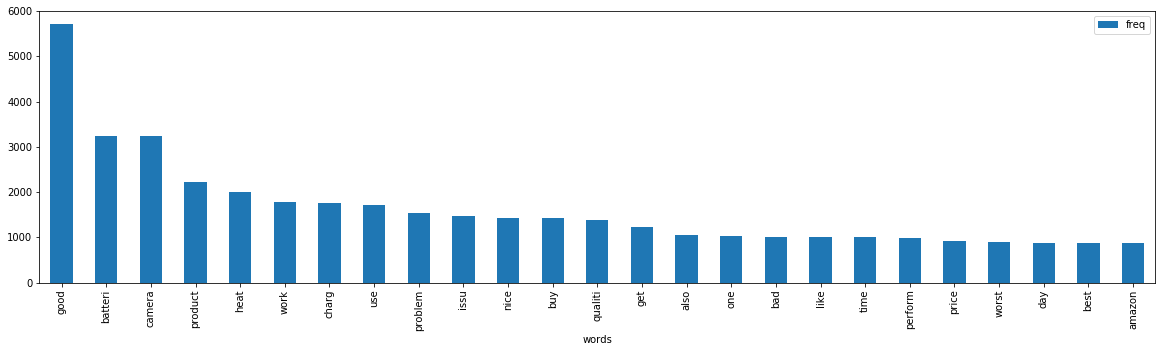

In [52]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

# Plot the bar graph for top 25 frequenctly used bigrams

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features=150)

In [55]:
X_bigram = bigram_count_vectorizer.fit_transform(reviews['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [56]:
bigram_count_vectorizer.get_feature_names()[:20]

['4000 mah',
 '4gb ram',
 'also good',
 'back camera',
 'back cover',
 'backup good',
 'bad experi',
 'bad product',
 'batteri back',
 'batteri backup',
 'batteri charg',
 'batteri drain',
 'batteri get',
 'batteri good',
 'batteri heat',
 'batteri last',
 'batteri life',
 'batteri perform',
 'batteri problem',
 'best price']

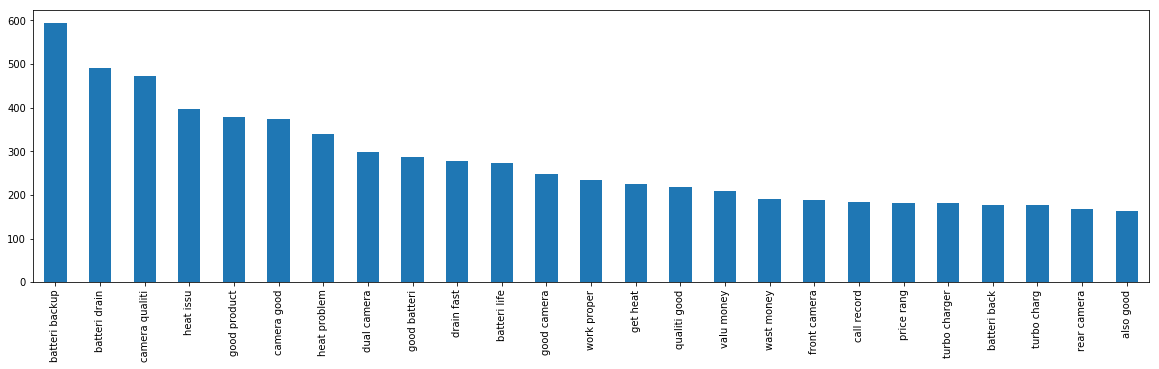

In [57]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5))  

In the amazon case study dataset
Find the top 5 relavent reviews which has the below words

 - "battery drain"
 - "Good camera"

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
# create a bigram count vectorizer object
bigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2))

In [60]:
X_bigram = bigram_tfidf_vectorizer.fit_transform(reviews['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), 
                          columns=bigram_tfidf_vectorizer.get_feature_names())

In [61]:
DTM_bigram['batteri drain'].sort_values(ascending=False).head(5)

6404    0.665165
6486    0.665165
3130    0.665165
2964    0.665165
112     0.665165
Name: batteri drain, dtype: float64

In [62]:
DTM_bigram['good camera'].sort_values(ascending=False).head(5)

13420    1.000000
1439     0.753303
3127     0.753303
10756    0.735349
10047    0.735349
Name: good camera, dtype: float64

# Sentiment Classification

### Sentiment Prediction Strategy 1: Word based scoring 

In [63]:
afinn = pd.read_csv("AFINN-111.txt", sep="\t", header=None)
afinn.columns = ['Term','Score']
term_scores = dict(afinn.values)

In [64]:
def get_sentiment(sent):
    tokens = word_tokenize(sent.lower())
    score = 0
    for term in tokens:
        score += term_scores.get(term,0)
    return score

In [65]:
reviews['sent_score'] = reviews.clean_review.apply(get_sentiment)

In [66]:
reviews.head()

,sentiment,review,clean_review,sent_score
0,1,Good but need updates and improvements,good need updat improv,3
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0
3,1,Good,good,3
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7


In [67]:
reviews['sent_prediction'] = \
reviews.sent_score.apply(lambda x:1 if x>0 else 0)

In [68]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0
3,1,Good,good,3,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0


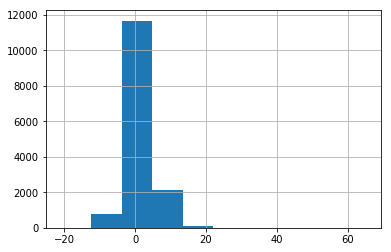

In [69]:
reviews.sent_score.hist()

In [70]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0
3,1,Good,good,3,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0


In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [72]:
accuracy_score(reviews.sentiment,reviews.sent_prediction)

0.7118228279386712

In [73]:
def clean_txt_new(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [term for term in tokens \
               if term not in stop_updated and \
                term not in list(punctuation) and\
               len(term) > 2] 
    res = " ".join(stemmed)
    return res

In [74]:
reviews['clean_review_unstemmed'] = reviews.review.apply(clean_txt_new)

In [75]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_unstemmed
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,get cash back already january..
3,1,Good,good,3,1,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0,worst everthey changed last problem still amaz...


In [76]:
reviews['sent_score_unstemmed'] = reviews.clean_review_unstemmed.apply(get_sentiment)

In [77]:
reviews['sent_prediction_unstemmed'] = \
reviews.sent_score_unstemmed.apply(lambda x:1 if x>2 else 0)

In [78]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_unstemmed)

0.776763202725724

### Sentiment Prediction Strategy 2: Using popular package - Vader

In [79]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [80]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [81]:
reviews['score_vader'] = reviews.review.apply(get_vader_sentiment)

In [82]:
reviews['sent_prediction_vader'] = reviews.score_vader.apply(lambda x:1 if x>0.3 else 0)

In [83]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_vader)

0.7990459965928449

### Sentiment Prediction Strategy 3: Building our own model

Step1: get the X and y
Step2: Split into test and train
Step3: converting text to numbers (countvectorizer or tfidfvectorizer)
Step4: train
Step5: test and get the accuracy scores

In [84]:
X = reviews.clean_review.values
y = reviews.sentiment.values

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,
                                                 random_state=42)

In [86]:
#Create a document term matrix
from sklearn.feature_extraction.text import \
CountVectorizer, TfidfVectorizer

In [87]:
count_vect = CountVectorizer()

In [88]:
#Extract the features on the reviews for train - fit
#Compute the count of every word extarcted in every document(review)
X_train_bow = count_vect.fit_transform(X_train)

In [89]:
#For all the features extarcted, compute the 
#count in the test data set of reveiws
X_test_bow = count_vect.transform(X_test)

In [90]:
print(X_train_bow.shape, X_test_bow.shape)

(10272, 8521) (4403, 8521)


In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
logreg = LogisticRegression()

In [93]:
logreg.fit(X_train_bow,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
y_test_pred = logreg.predict(X_test_bow)

In [95]:
accuracy_score(y_test, y_test_pred)

0.8503293209175562

### Document clustering

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(max_features=150)

In [97]:
X = tfidfvectorizer.fit_transform(reviews['clean_review'])

In [98]:
from sklearn.cluster import KMeans

In [99]:
num_clusters = 6
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [100]:
pred_cluster = km.predict(X)
reviews['cluster_predicted'] = pred_cluster
reviews['cluster_predicted'].value_counts()

3    7704
0    3034
1    1497
2     951
5     899
4     590
Name: cluster_predicted, dtype: int64

In [101]:
pred_cluster.shape

(14675,)

In [102]:
km.cluster_centers_.shape

(6, 150)

in TFIDF or in DTM every word is a feature
when these words are clustered, the cluster center value for every feature tells us the centeroid of the word relavencies/frequencies.

Higher the cluster centeroid for that feature, higher will be value of word relevency/frequency.

In [103]:
print("Top 5 terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidfvectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, : 5]:
        print (' %s' % terms[ind]),
    print

Top 5 terms per cluster:
Cluster 0:
 batteri
 heat
 charg
 good
 camera
Cluster 1:
 good
 product
 camera
 price
 batteri
Cluster 2:
 nice
 product
 good
 camera
 one
Cluster 3:
 product
 camera
 good
 work
 bad
Cluster 4:
 best
 price
 rang
 good
 camera
Cluster 5:
 problem
 heat
 batteri
 good
 network


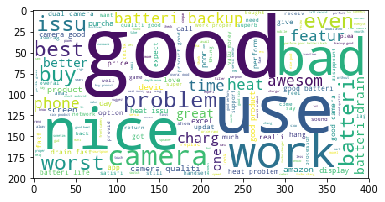

In [105]:
group = reviews[reviews['cluster_predicted'] == 1]
text = ' '.join(reviews['clean_review'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc)

### Document similarity

In [106]:
from sklearn.metrics.pairwise import cosine_similarity

In [107]:
count_vect = CountVectorizer(max_features=1500)

In [108]:
X = count_vect.fit_transform(reviews['clean_review'])

In [109]:
df = pd.DataFrame(X.toarray(),
                        columns=count_vect.get_feature_names())

In [110]:
#Check the cosine similarity with the second and the third reviews
cosine_similarity(df[1:2], df[2:3])

array([[0.06868028]])

In [111]:
#Check the cosine similarity with the second and the third reviews
cosine_similarity(df[1:2], df[2:3])

array([[0.06868028]])

In [112]:
cs = cosine_similarity(df)

In [113]:
# for second review of the lenovo k8 get the top 5 similar reviews
pd.DataFrame(reviews.review.values[cs[1].argsort()[::-1][1:6]])

,0
0,Battery issue full charge 100% you have used o...
1,Very worst product from Lenovo...1. Phone gets...
2,Battery issue it will take 5 hour to charge full
3,Worst ever lenovo phone in terms of battery ba...
4,Please read the full review here.This phone is...


In [114]:
#for the review with the least polarity score get the top 5 similar reveiws
ind = reviews.score_vader.sort_values().head(1).index[0]
ind

8075

In [115]:
pd.DataFrame(reviews.review.values[cs[ind].argsort()[::-1][1:6]])

,0
0,Wast
1,waste
2,Waste mobile phone
3,Waste mobile
4,Waste mobile


In [121]:
#Obtaining similarity between words
cs = cosine_similarity(df.T)

In [122]:
def get_similar_words(input_word, sim_mat):
    cos_vals = sim_mat[input_word].sort_values(ascending=False)
    similar_words = cos_vals.drop(input_word).head(5)
    return similar_words

In [123]:
sim_mat = cosine_similarity(df.T)
sim_mat = pd.DataFrame(sim_mat, columns= df.columns, 
                       index= df.columns)

In [124]:
get_similar_words('drain', sim_mat)

batteri    0.482576
fast       0.446616
charg      0.231530
heat       0.220828
even       0.210655
Name: drain, dtype: float64

In [125]:
sim_mat['charge'].sort_values(ascending=False).drop('charge').head(5)

hour     0.148972
repli    0.146647
full     0.146135
take     0.125054
10min    0.117851
Name: charge, dtype: float64